<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/Fuzzy/fuzzy_energia_cinetica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISTEMA DE INFERÊNCIA FUZZY (SIF)
*Energia Cinética - com o método de Mamdani*

*Autor: Cesar A. Tacla, UTFPR, abril, 2024*

Imaginemos um cenário de um software educacional que serve de instrumento para ensinar a estudantes iniciantes em física a relação entre massa, velocidade e energia cinética.

Dadas as duas entradas, massa e velocidade, o Sistema de Inferência Fuzzy (SIF)diz se a energia cinética é pequena, média, alta ou muito alta. Observar que a saída do sistema fuzzy de inferência (SIF) é o grau de pertencimento às categorias pequena, média, alta ou muito alta (o SIF não retorna o valor da energia que é dado pela fórmula e = mv^2/2 (Jaules)).

In [39]:
import numpy as np

try:
    import skfuzzy as fuzz
    print("sklearn está instalado.")
except ImportError:
    print("sklearn não está instalado.")
    !pip install -U scikit-fuzzy
    import skfuzzy as fuzz

from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

sklearn está instalado.


# SISTEMA FUZZY

## Inicialização

 Na inicialização, definimos as entradas (antecedentes, segundo a nomenclatura da biblioteca skfuzzy) e os consequentes (a saída). Também, definimos o método de desfuzzificação da variável linguística de saída:
 - 'centroid',
 - 'mom' (mean of maximum),
 - 'som'(smallest of maximum),
 - 'bisector'(2 areas iguais a partir do ponto de max).

Para cada variável, definimos seu universo e um nome associado:
 - massa: [0, 5] kg
 - velocidade: [0, 10] m/s
 - e_cin: [0, 100], valores altos de massa e velocidade devem produzir saídas próximas ou iguais a 100; valores baixos de massa e velocidade, próximas ou iguais a zero.


In [40]:
# variáveis linguisticas de entrada e saída
massa_range = np.arange(0, 5.1, 0.1)
velocidade_range = np.arange(0, 10.1, 0.1)
massa = ctrl.Antecedent(massa_range, 'massa')
velocidade = ctrl.Antecedent(velocidade_range, 'velocidade')

# variável linguística de saida
# Metodo de desfuzificação
# 'centroid', 'mom' (mean of maximum), 'bisector'(2 areas iguais a partir do ponto de max), 'som'(smallest of maximum),
e_cin_range = np.arange(0, 100.1, 0.1)
e_cin = ctrl.Consequent(e_cin_range, 'e_cin', defuzzify_method='mom')

## VARIÁVEL DE ENTRADA: MASSA

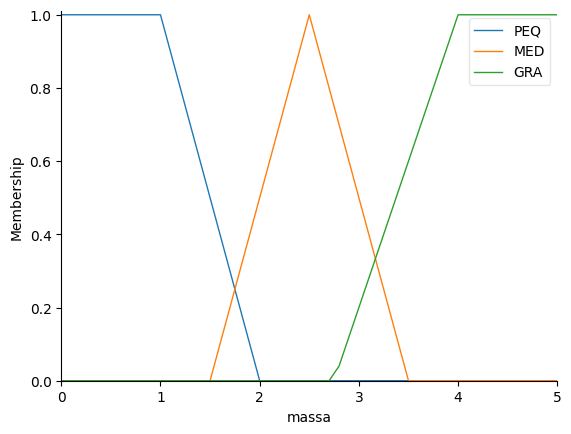

In [41]:
# termos linguísticos para a massa
massa['PEQ'] = fuzz.trapmf(massa.universe, [0, 0, 1, 2])
massa['MED'] = fuzz.trimf(massa.universe, [1.5, 2.5, 3.5])
massa['GRA'] = fuzz.trapmf(massa.universe, [2.75, 4, 5, 5])
massa.view()

## VARIÁVEL DE ENTRADA: VELOCIDADE


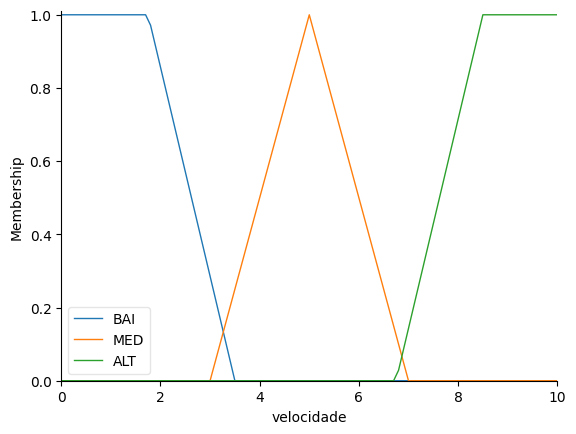

In [42]:
# termos linguísticos para a velocidade
velocidade['BAI'] = fuzz.trapmf(velocidade.universe, [0, 0, 1.75, 3.5])
velocidade['MED'] = fuzz.trimf(velocidade.universe, [3, 5, 7])
velocidade['ALT'] = fuzz.trapmf(velocidade.universe, [6.75, 8.5, 10, 10])
velocidade.view()

## Variável de saída: ENERGIA CINÉTICA

odict_keys(['PEQ', 'MED', 'ALT', 'MALT']) tam = 4


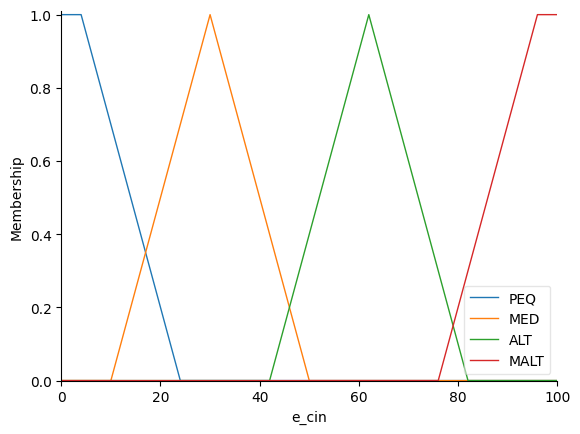

In [43]:
# termos linguísticos para a energia cinética
e_cin['PEQ'] = fuzz.trapmf(e_cin.universe, [0, 0, 4, 24])
e_cin['MED'] = fuzz.trimf(e_cin.universe, [10, 30, 50])
e_cin['ALT'] = fuzz.trimf(e_cin.universe, [42, 62, 82])
e_cin['MALT'] = fuzz.trapmf(e_cin.universe, [76, 96, 100, 100])
e_cin.view()
print(f"{e_cin.terms.keys()} tam = {len(e_cin.terms.keys())}")

## Definição das regras

As regras foram criadas manualmente. Observe que todas as combinações dos termos linguísticos de entrada estão nos antecedentes das regras. Isto não é obrigatório, já que a inferência Fuzzy se baseia no Modus Ponens generalizado que é capaz de realizar interpolações para regiões do espaço das entradas que não foram cobertas pelas regras.

In [44]:
# regras
regras = [ ]
regras.append(ctrl.Rule(massa['PEQ'] & velocidade['BAI'], e_cin['PEQ']))
regras.append(ctrl.Rule(massa['PEQ'] & velocidade['MED'], e_cin['MED']))
regras.append(ctrl.Rule(massa['PEQ'] & velocidade['ALT'], e_cin['MED']))
regras.append(ctrl.Rule(massa['MED'] & velocidade['BAI'], e_cin['PEQ']))
regras.append(ctrl.Rule(massa['MED'] & velocidade['MED'], e_cin['MED']))
regras.append(ctrl.Rule(massa['MED'] & velocidade['ALT'], e_cin['ALT']))
regras.append(ctrl.Rule(massa['GRA'] & velocidade['BAI'], e_cin['MED']))
regras.append(ctrl.Rule(massa['GRA'] & velocidade['MED'], e_cin['ALT']))
regras.append(ctrl.Rule(massa['GRA'] & velocidade['ALT'], e_cin['MALT']))

Vamos criar uma representação alternativa das regras para calcularmos os valores de disparo de cada regra, já que o sckfuzzy não deixa acessar diretamente.

Cada linha representa uma regra. Cada regra faz referência a um termo linguístico de massa, velocidade e e_cin. A última coluna diz se é um AND (1) ou um OR (2). Segue a sintaxe do MatLab, exceto que não colocamos a coluna weight.


In [45]:
regras_alt = [[0,0,0,1],
              [0,1,1,1],
              [0,2,1,1],
              [1,0,0,1],
              [1,1,1,1],
              [1,2,2,1],
              [2,0,1,1],
              [2,1,2,1],
              [2,2,3,1]]

# INSTANCIAÇÃO DO SIF

Com as variáveis linguísticas de entrada e saída definidas e as regras, podemos instanciar o sistema de inferência fuzzy (SIF).


In [46]:
# Sistema de fuzzy
sif_ctrl = ctrl.ControlSystem(regras)
sif = ctrl.ControlSystemSimulation(sif_ctrl)

# ENTRADAS PARA O SISTEMA
Vamos definir uma entrada, um valor para massa e outro, para a velocidade, e ver a inferência feita pelo sistema. Vamos caluclar a saída para poder plotar os graus de ativação.

In [47]:
# Entrada de exemplo
massa_input = 1.8
velocidade_input = 6.8
sif.input['massa'] = massa_input
sif.input['velocidade'] = velocidade_input

# Computa a saída
sif.compute()



# PASSOS

## FUZZIFICAÇÃO DA VARIÁVEL MASSA
O sistema determina o grau de pertencimento de cada valor de entrada aos termos linguísticos (*matching*). Por exemplo, dado um valor de massa, qual o seu grau de pertencimento aos conjuntos PEQUENO, MÉDIO E/OU GRANDE?


*** ENTRADAS ***
Graus de pertinência da entrada massa = 1.8
  ao termo PEQ = 0.200
  ao termo MED = 0.300
  ao termo GRA = 0.000


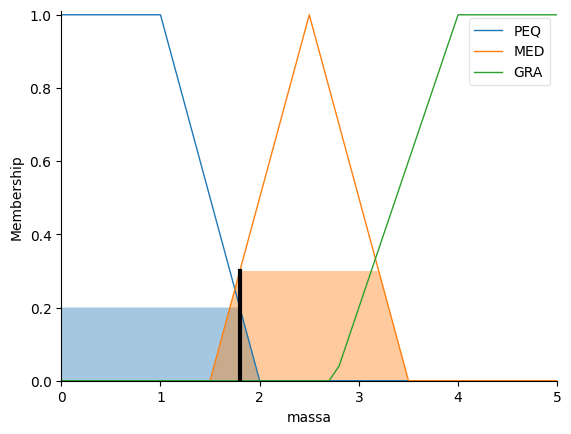

In [48]:
print(f"\n*** ENTRADAS ***")
print(f"Graus de pertinência da entrada massa = {massa_input}")
mi_massa =  [0] * len(massa.terms.keys())
i = 0
for termo, fuzzy_set in massa.terms.items():
    mi_massa[i] = fuzz.interp_membership(massa.universe, massa[termo].mf, massa_input)
    print(f"  ao termo {termo} = {mi_massa[i]:.3f}")
    i = i + 1

# Plotar o grau de pertinência
massa.view(sim=sif)


FUZZIFICAÇÃO DA VARIÁVEL VELOCIDADE

Para o valor de entrada de velocidade, qual o seu pertencimento aos termos linguísticos BAIXA, MÉDIA E/OU ALTA?



Graus de pertinência da entrada velocidade = 6.8
  ao termo BAI = 0.000
  ao termo MED = 0.100
  ao termo ALT = 0.029


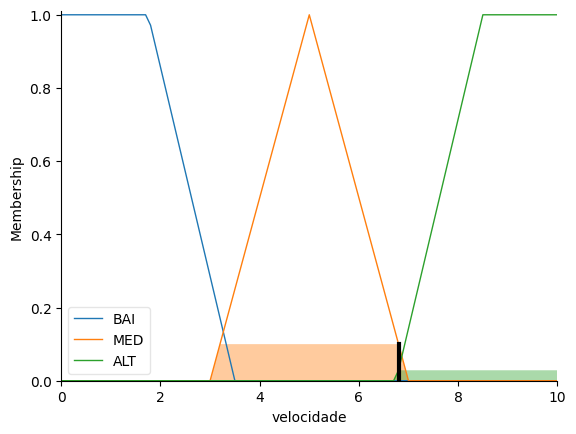

In [49]:

print(f"\nGraus de pertinência da entrada velocidade = {velocidade_input}")
mi_velocidade =  [0] * len(velocidade.terms.keys())
i = 0
for termo, fuzzy_set in velocidade.terms.items():
    mi_velocidade[i] = fuzz.interp_membership(velocidade.universe, velocidade[termo].mf, velocidade_input)
    print(f"  ao termo {termo} = {mi_velocidade[i]:.3f}")
    i = i + 1

velocidade.view(sim=sif)

# DISPARO DAS REGRAS
Após a fuzzificação das variáveis de entrada ou matching com os antecedentes das regras, o SIF calcula o nível de disparo de cada consequente de regra (que é um termo linguístico de saída). O nível de disparo depende da semântica escolhida para AND e OR. Vamos utilizar MIN para AND e MAX para OR.

In [50]:
nivel_disparo = [0] * len(regras_alt)          # nivel de disparo por regra
nivel_agregado = [0] * len(e_cin.terms.keys()) # maior nivel de disparo por termo de saída
for i, r_alt in enumerate(regras_alt):
  if r_alt[3] == 1:    # AND
     nivel_disparo[i] = min(mi_massa[r_alt[0]], mi_velocidade[r_alt[1]])
  else: # OR
     nivel_disparo[i] = max(mi_massa[r_alt[0]], mi_velocidade[r_alt[1]])

  if nivel_disparo[i] > nivel_agregado[r_alt[2]]:
     nivel_agregado[r_alt[2]] = nivel_disparo[i]

print(f"\n*** Nível de disparo por regra ***")
for i, r in enumerate(sif_ctrl.rules):
  print(f"Regra {i}: {r.antecedent} ==> {r.consequent} {nivel_disparo[i]:.3f}")

print(f"\n*** Agregação dos consequentes das regras ***")
for i, termo in enumerate(e_cin.terms):
  print(f"{termo} = {nivel_agregado[i]:.3f}")


*** Nível de disparo por regra ***
Regra 0: massa[PEQ] AND velocidade[BAI] ==> [e_cin[PEQ]] 0.000
Regra 1: massa[PEQ] AND velocidade[MED] ==> [e_cin[MED]] 0.100
Regra 2: massa[PEQ] AND velocidade[ALT] ==> [e_cin[MED]] 0.029
Regra 3: massa[MED] AND velocidade[BAI] ==> [e_cin[PEQ]] 0.000
Regra 4: massa[MED] AND velocidade[MED] ==> [e_cin[MED]] 0.100
Regra 5: massa[MED] AND velocidade[ALT] ==> [e_cin[ALT]] 0.029
Regra 6: massa[GRA] AND velocidade[BAI] ==> [e_cin[MED]] 0.000
Regra 7: massa[GRA] AND velocidade[MED] ==> [e_cin[ALT]] 0.000
Regra 8: massa[GRA] AND velocidade[ALT] ==> [e_cin[MALT]] 0.000

*** Agregação dos consequentes das regras ***
PEQ = 0.000
MED = 0.100
ALT = 0.029
MALT = 0.000


## CONJUNTOS FUZZY DE SAÍDA

Finalmente, podemos plotar os conjuntos fuzzy de saida agregados em função do valor do disparo das regras (agregação dos consequentes pelo nível máximo de disparo).

Podemos obter um valor escalar de saída por algum dos métodos de desfuzzificação abaixo:
* mom: mean of maximum
* centroid
* som: smallest of maximum

Também, é possível obter o termo linguístico de saída que apresenta o maior grau de pertinência.


Valor de massa = 1.8 e velocidade = 6.8 
Valor da saida do SIF para a energia cinetica = 29.985 desfuzzificada por mom
Termo de saída: MED



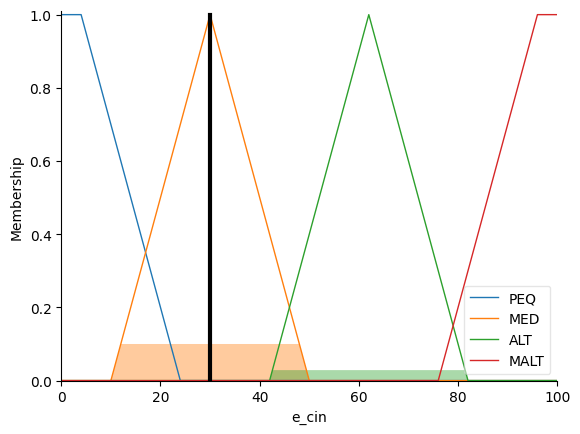

In [51]:
print(f"\nValor de massa = {massa_input} e velocidade = {velocidade_input} ")

# Obter o valor desfuzzificado
output = sif.output['e_cin']
print(f"Valor da saida do SIF para a energia cinetica = {output:.3f} desfuzzificada por {e_cin.defuzzify_method}")

# Obter o termo de saida mais relevante a partir do valor desfuzzificado
termo_saida = max(e_cin.terms.keys(), key=lambda term: fuzz.interp_membership(e_cin.universe, e_cin[term].mf, output))
print(f"Termo de saída: {termo_saida}\n")

# plota os termos linguisticos (conjuntos fuzzy) de saída
e_cin.view(sim=sif)

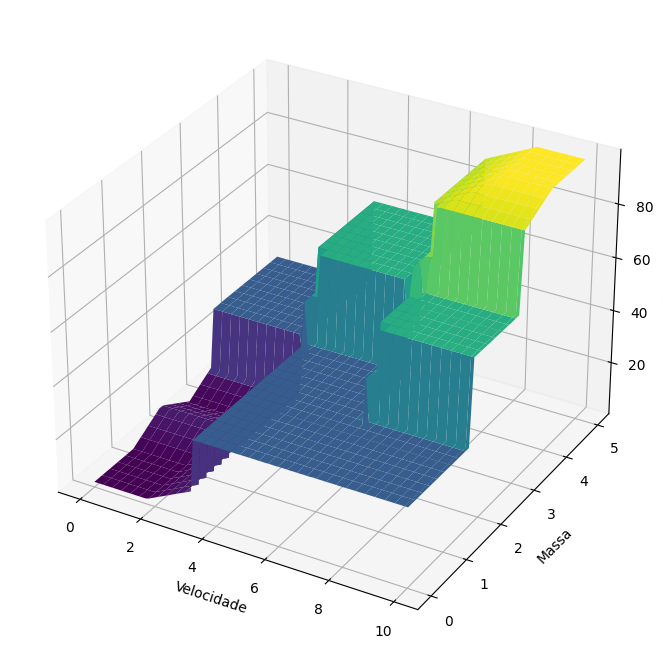

In [55]:
# Generate meshgrid for input universes
massa_grid, velocidade_grid = np.meshgrid(massa_range, velocidade_range)

# Compute membership degrees for each combination of input values
output_surface = np.zeros_like(massa_grid)
for i in range(massa_grid.shape[0]):
    for j in range(massa_grid.shape[1]):
        #print(f"{i}, {j} = {massa_grid[i,j]}")
        sif.input['massa'] = massa_grid[i, j]
        sif.input['velocidade'] = velocidade_grid[i, j]
        # Computa a saída
        sif.compute()
        output_surface[i, j] = sif.output['e_cin']

# Plot the surface
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(velocidade_grid, massa_grid, output_surface, cmap='viridis')

# Set axis labels
ax.set_xlabel('Velocidade')
ax.set_ylabel('Massa')
ax.set_zlabel('Energia')

# Show the plot
plt.subplots_adjust(left=0.05, right=0.85, top=0.9, bottom=0.1)
plt.show()